# GRIP : The Sparks Foundation

**Data Science and Buisness Analytics Intern**

**BATCH : JULY 2022**

**Task 2 : Prediction Using Unsupervised ML**

**Author : Akash Rai**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
df = pd.read_csv('iris.csv')

In [3]:
df = df.drop('Id',axis=1)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.shape

(150, 5)

# Data Visualization:

**With the help of pairplot we can see that how all the numerical values are correlated to each other,**
**in the daigonal we see the histogram and rest of the places we see the scatterplot**

<Figure size 800x200 with 0 Axes>

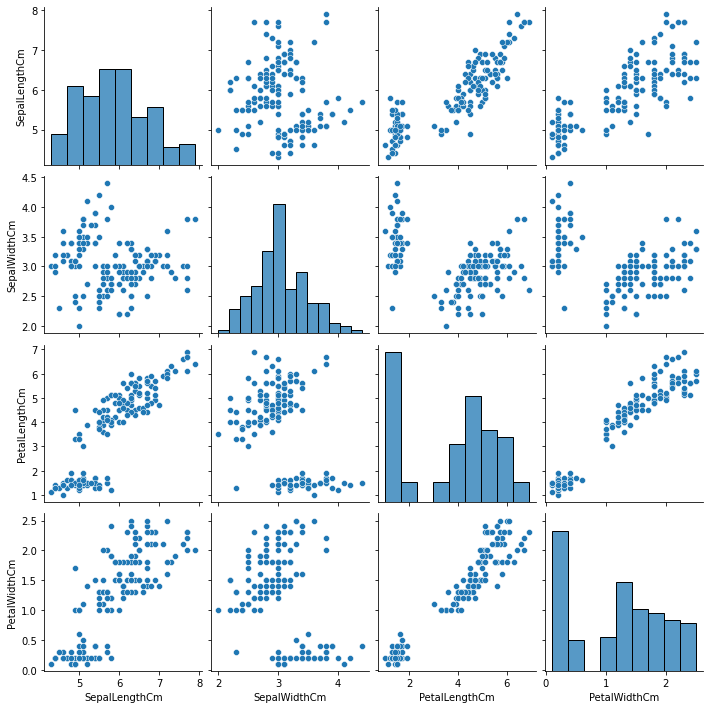

In [9]:
plt.figure(figsize=(8,2),dpi=100)
sns.pairplot(df)

**we will basically use the boxplot to see the outliers**

<AxesSubplot:>

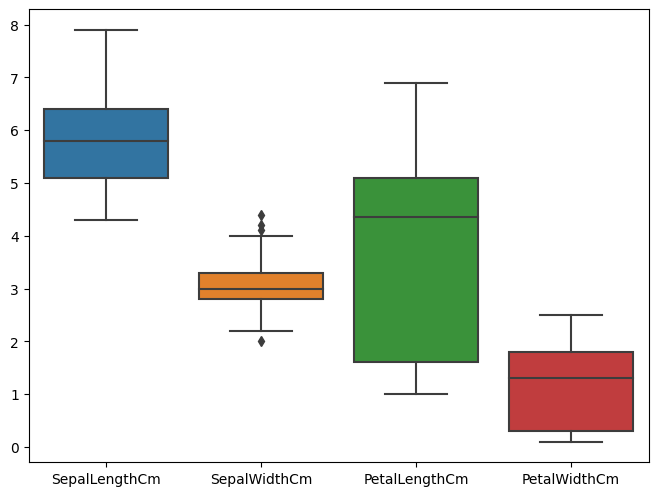

In [10]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=df)

**Correlation:**

In [11]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Now here we find out the optimum cluster of k means:

**Here we use elbow method for finding out optimum cluster of k means so here we have to plot inertia graph which tells us 
how far away the points within clusters are.**

In [12]:
x = df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
WCSS = []  # sum of square within cluster

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    
    km.fit(x)
    WCSS.append(km.inertia_)

**Plotting inertia graph:**

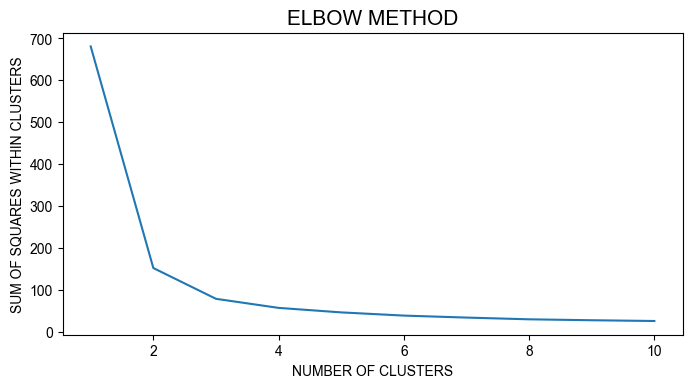

In [13]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(1,11),WCSS)
sns.set_style('darkgrid')
plt.title('ELBOW METHOD',size=15)
plt.xlabel('NUMBER OF CLUSTERS',size=10)
plt.ylabel('SUM OF SQUARES WITHIN CLUSTERS',size=10)
plt.show()

# Creating K-Means classifire:

In [14]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

**Plotting the clusters:**

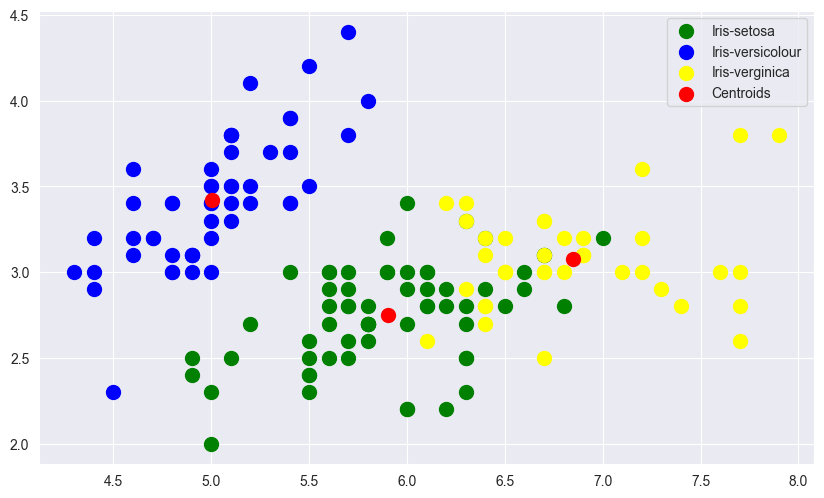

In [15]:
plt.figure(figsize=(10,6),dpi=100)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='green')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='yellow')


# Centroids of clustering
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red')
plt.legend(['Iris-setosa','Iris-versicolour','Iris-verginica','Centroids'])
plt.show()